In [71]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import qiskit
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes,ZZFeatureMap
import qiskit_machine_learning
from qiskit_machine_learning.algorithms.classifiers import VQC,NeuralNetworkClassifier
from qiskit.utils import algorithm_globals as alg
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.algorithms.optimizers import COBYLA
import random

In [72]:
# create a dummy data
inputs = 2
samples = 30
inputs = 2
samples = 20
X = 2*alg.random.random([samples,inputs])-1
y0 = 1*(np.sum(X,axis=1)>=0)
y = 2*y0-1

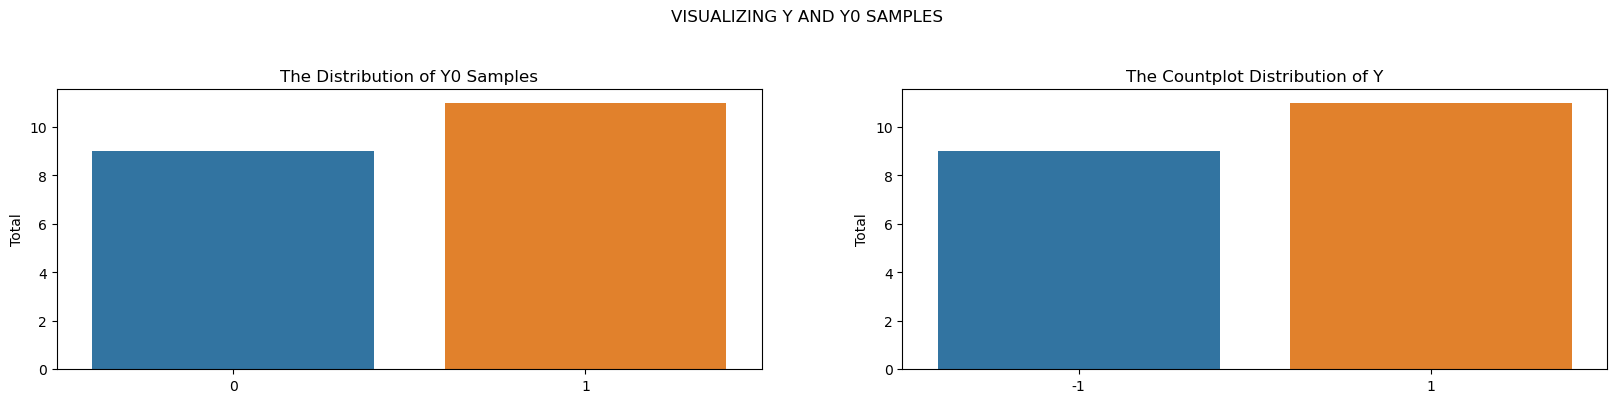

In [73]:
# Visualize our data 
fig = plt.figure(figsize=(20,8))
fig.suptitle("VISUALIZING Y AND Y0 SAMPLES")
plt.subplot(2,2,1)
sns.countplot(x= y0)
plt.ylabel("Total")
plt.title("The Distribution of Y0 Samples")
plt.subplot(2,2,2)
sns.countplot(x = y)
plt.ylabel("Total")
plt.title("The Countplot Distribution of Y")
plt.show()

In [74]:
# Encode our y
y_encode = np.zeros((samples,2))
for i in range(samples):
    y_encode[i,y0[i]]=1

In [75]:
y_encode

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

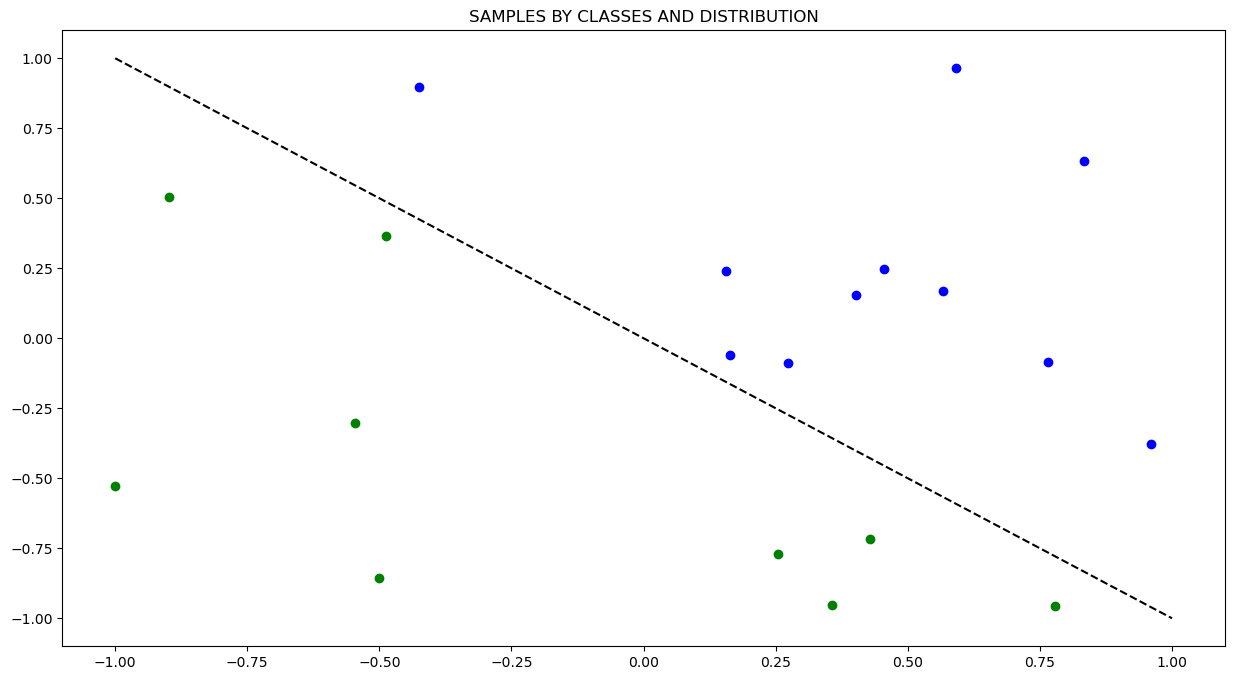

In [76]:
# VISUALIZING 
plt.figure(figsize=(15,8))
for x,y_target in zip(X,y):
    if y_target ==1 :
        plt.plot(x[0],x[1],"bo")
    else :
        plt.plot(x[0],x[1],"go")
plt.plot([-1,1],[1,-1],"--",color='black')
plt.title("SAMPLES BY CLASSES AND DISTRIBUTION")
plt.show()

# QUANTUM CIRCUIT,INTERPRET FUNCTION AND SAMPLER  QNN

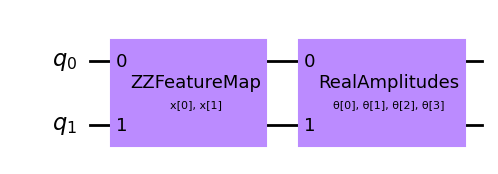

In [77]:
qc1 = QuantumCircuit(2)
features = ZZFeatureMap(inputs)
ansatz = RealAmplitudes(inputs,reps=1)
qc1.append(features,range(inputs))
qc1.append(ansatz,range(inputs))
qc1.decompose().draw("mpl")

In [78]:
# Create an interpret function that will assist us get a binary output ,say 0 and 1
def interpret_function (x):
    return "{:b}".format(x).count("1") % 2

In [79]:
# Instantiate the SamplerQNN
s_qnn = SamplerQNN(circuit=qc1,input_params=features.parameters,
                  weight_params=ansatz.parameters)

In [80]:
# Create a classifier
s_qnn_classifier = NeuralNetworkClassifier(neural_network = s_qnn,
                                          optimizer = COBYLA(maxiter=30))

In [81]:
s_qnn_classifier.fit(X,y0)

# EVALUATION OF OUR CLASSIFICATION MODEL

In [82]:
s_qnn_classifier.score(X,y0)

0.5

In [83]:
"""y_predict = s_qnn_classifier.predict(X)

for X,y_target,y_p in zip(X,y0,y_predict):
    if y_target.any() == 1:
        plt.plot(x[0],x[1],"bo")
    else :
        plt.plot(x[0],x[1],"go")
    if y_target !=y_p:
        plt.scatter(x[0],x[1],s=200,edgecolors="r",lw=2)
plt.plot([-1,1],[1,-1],"--",color="black") """

'y_predict = s_qnn_classifier.predict(X)\n\nfor X,y_target,y_p in zip(X,y0,y_predict):\n    if y_target.any() == 1:\n        plt.plot(x[0],x[1],"bo")\n    else :\n        plt.plot(x[0],x[1],"go")\n    if y_target !=y_p:\n        plt.scatter(x[0],x[1],s=200,edgecolors="r",lw=2)\nplt.plot([-1,1],[1,-1],"--",color="black") '

In [84]:
X.shape

(20, 2)

# VARIATIONAL QUANTUM CLASSIFIER

In [85]:
v_features = ZZFeatureMap(inputs)
v_ansatz = RealAmplitudes(inputs,reps=1)
vqc= VQC(feature_map=v_features,ansatz=v_ansatz,
                                 loss="cross_entropy",
                                 optimizer=COBYLA(maxiter=30))
qc= QuantumCircuit(2)
qc.append(v_features,range(inputs))
qc.append(v_ansatz,range(inputs))

In [86]:
y_encode.shape

(20, 2)

In [88]:
X.shape

(20, 2)

In [89]:
vqc.fit(X,y_encode)

In [90]:
predictions = vqc.predict(X)
predictions

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

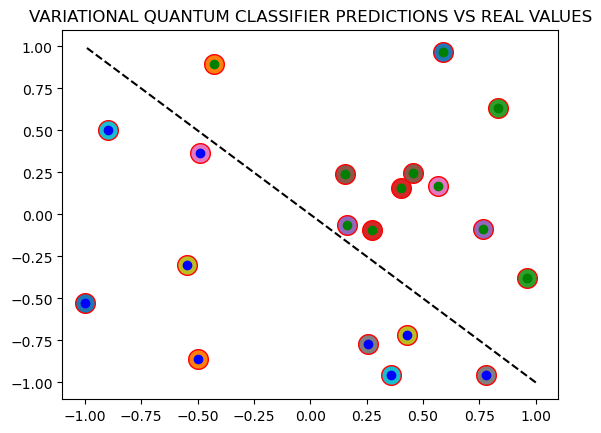

In [92]:
for x,y_target,y_p in zip(X,y_encode,y_predict):
    if y_target[0] == 1:
        plt.plot(x[0],x[1],"bo")
    else :
        plt.plot(x[0],x[1],"go")
    if not np.all(y_target==y_p):
        plt.scatter(x[0],x[1],s=200,facecolors=None,edgecolors="r")
plt.plot([1,-1],[-1,1],"--",color="black")
plt.title("VARIATIONAL QUANTUM CLASSIFIER PREDICTIONS VS REAL VALUES")
plt.show()

# REFERENCES 
https://qiskit.org/ecosystem/machine-learning/tutorials/01_neural_networks.html